In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [146]:
from statsmodels.tools.eval_measures import rmse, aic

In [3]:
df = pd.read_csv('./Beijing.csv')

In [4]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,CO,TEMP,PRES,RAIN,HUMI,DEWP,WD,WS
0,2014,1,1,0,31.0,117.0,15.0,73.0,NaN,NaN,-0.4,1009.1,0.0,34.0,-14.4,NW,1.2
1,2014,1,1,1,58.0,154.0,39.0,84.0,4.0,1.5,-1.1,1008.8,0.0,40.0,-13.0,NW,1.2
2,2014,1,1,2,68.0,162.0,39.0,85.0,4.0,1.7,-1.4,1008.8,0.0,41.0,-13.0,SW,0.7
3,2014,1,1,3,83.0,189.0,63.0,83.0,5.0,1.7,-2.4,1008.2,0.0,46.0,-12.5,SE,0.6
4,2014,1,1,4,75.0,190.0,55.0,83.0,3.0,2.1,-2.5,1008.0,0.0,46.0,-12.6,CV,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2015,12,31,19,112.0,112.0,28.0,114.0,23.0,2.3,-1.4,1026.3,0.0,58.0,-8.6,SE,1.0
17516,2015,12,31,20,122.0,132.0,27.0,118.0,26.0,3.2,-2.5,1026.2,0.0,64.0,-8.4,SE,1.3
17517,2015,12,31,21,149.0,179.0,30.0,125.0,31.0,4.5,-2.7,1025.8,0.0,67.0,-8.0,NE,0.9
17518,2015,12,31,22,196.0,230.0,29.0,130.0,33.0,4.6,-3.5,1025.5,0.0,73.0,-7.6,CV,0.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    17520 non-null  int64  
 1   month   17520 non-null  int64  
 2   day     17520 non-null  int64  
 3   hour    17520 non-null  int64  
 4   PM2.5   17077 non-null  float64
 5   PM10    17212 non-null  float64
 6   SO2     17198 non-null  float64
 7   NO2     17064 non-null  float64
 8   O3      17193 non-null  float64
 9   CO      17122 non-null  float64
 10  TEMP    17518 non-null  float64
 11  PRES    17518 non-null  float64
 12  RAIN    17518 non-null  float64
 13  HUMI    17518 non-null  float64
 14  DEWP    17518 non-null  float64
 15  WD      17518 non-null  object 
 16  WS      17518 non-null  float64
dtypes: float64(12), int64(4), object(1)
memory usage: 2.3+ MB


In [16]:
import datetime
df['time'] = df.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)
df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
df = df.set_index('time')

KeyError: 'year'

In [5]:
import datetime
df['time'] = df.apply(lambda x : datetime.datetime(year=x['year'], month=x['month'], day=x['day'], hour=x['hour']), axis=1)
df.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

In [17]:
df2=df.set_index('time')

In [6]:
df

,PM2.5,PM10,SO2,NO2,O3,CO,TEMP,PRES,RAIN,HUMI,DEWP,WD,WS,time
0,31.0,117.0,15.0,73.0,NaN,NaN,-0.4,1009.1,0.0,34.0,-14.4,NW,1.2,2014-01-01 00:00:00
1,58.0,154.0,39.0,84.0,4.0,1.5,-1.1,1008.8,0.0,40.0,-13.0,NW,1.2,2014-01-01 01:00:00
2,68.0,162.0,39.0,85.0,4.0,1.7,-1.4,1008.8,0.0,41.0,-13.0,SW,0.7,2014-01-01 02:00:00
3,83.0,189.0,63.0,83.0,5.0,1.7,-2.4,1008.2,0.0,46.0,-12.5,SE,0.6,2014-01-01 03:00:00
4,75.0,190.0,55.0,83.0,3.0,2.1,-2.5,1008.0,0.0,46.0,-12.6,CV,0.4,2014-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,112.0,112.0,28.0,114.0,23.0,2.3,-1.4,1026.3,0.0,58.0,-8.6,SE,1.0,2015-12-31 19:00:00
17516,122.0,132.0,27.0,118.0,26.0,3.2,-2.5,1026.2,0.0,64.0,-8.4,SE,1.3,2015-12-31 20:00:00
17517,149.0,179.0,30.0,125.0,31.0,4.5,-2.7,1025.8,0.0,67.0,-8.0,NE,0.9,2015-12-31 21:00:00
17518,196.0,230.0,29.0,130.0,33.0,4.6,-3.5,1025.5,0.0,73.0,-7.6,CV,0.4,2015-12-31 22:00:00


In [7]:
df['WD'] = df['WD'].fillna(method='ffill')
df['WD'].unique()

array(['NW', 'SW', 'SE', 'CV', 'NE'], dtype=object)

In [8]:
df['RAIN'].isna().sum()

2

Text(0, 0.5, 'Volume C10 Petrignano')

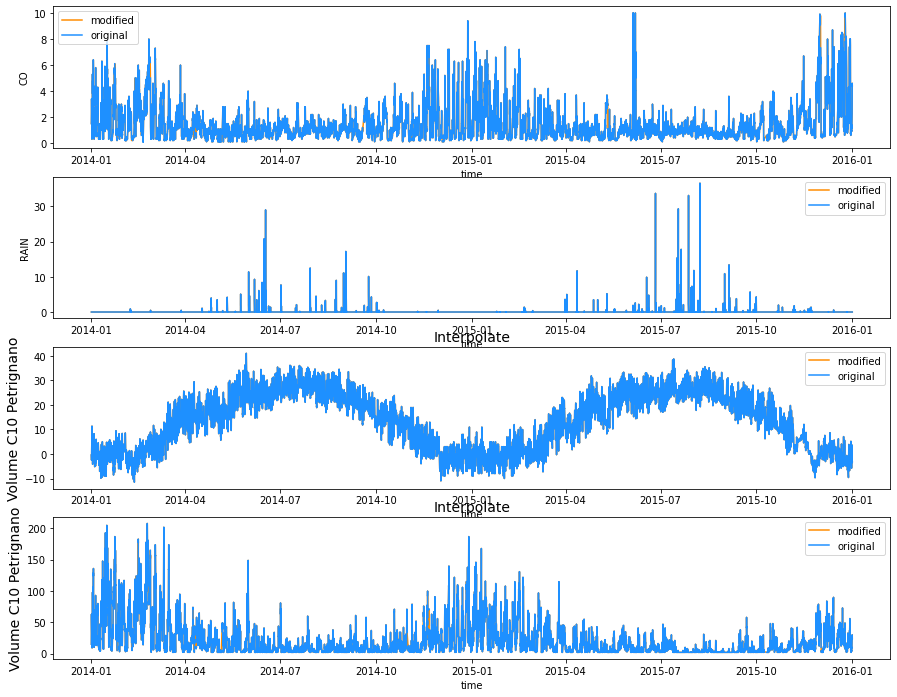

In [9]:
#使用插值法进行缺失值填补
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))
sns.lineplot(x=df['time'], y=df['SO2'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['time'], y=df['SO2'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['time'], y=df['TEMP'].interpolate(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['time'], y=df['TEMP'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'Interpolate', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['time'], y=df['RAIN'].interpolate(), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['time'], y=df['RAIN'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[2].set_title(f'Interpolate', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

sns.lineplot(x=df['time'], y=df['CO'].interpolate(), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['time'], y=df['CO'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[2].set_title(f'Interpolate', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano', fontsize=14)

In [20]:
df = df.join(pd.get_dummies(df['WD'])) # one-hot encoding
del df['WD']
df.head()

,PM2.5,PM10,SO2,NO2,O3,CO,TEMP,PRES,RAIN,HUMI,DEWP,WS,time,CV,NE,NW,SE,SW
0,31.0,117.0,15.0,73.0,NaN,NaN,-0.4,1009.1,0.0,34.0,-14.4,1.2,2014-01-01 00:00:00,0,0,1,0,0
1,58.0,154.0,39.0,84.0,4.0,1.5,-1.1,1008.8,0.0,40.0,-13.0,1.2,2014-01-01 01:00:00,0,0,1,0,0
2,68.0,162.0,39.0,85.0,4.0,1.7,-1.4,1008.8,0.0,41.0,-13.0,0.7,2014-01-01 02:00:00,0,0,0,0,1
3,83.0,189.0,63.0,83.0,5.0,1.7,-2.4,1008.2,0.0,46.0,-12.5,0.6,2014-01-01 03:00:00,0,0,0,1,0
4,75.0,190.0,55.0,83.0,3.0,2.1,-2.5,1008.0,0.0,46.0,-12.6,0.4,2014-01-01 04:00:00,1,0,0,0,0


In [10]:
cols = df.columns

for j in cols:

    df[j].interpolate()

In [24]:
df.to_csv('./complete.csv',sep=',',index=False,header=True)

In [13]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [256]:
train=df3[:int(0.8*(len(df3)))]
valid=df3[int(0.8*(len(df3))):]

In [152]:
valid

,CO,SO2,NO2,TEMP,RAIN,PRES
time,,,,,,
2014-01-01 00:00:00,1.5,15.0,73.0,0.0,0.0,1009.1
2014-01-01 01:00:00,1.5,39.0,84.0,0.0,0.0,1008.8
2014-01-01 02:00:00,1.7,39.0,85.0,0.4,0.0,1008.8
2014-01-01 03:00:00,0.0,63.0,83.0,-1.1,0.0,1008.2
2014-01-01 04:00:00,0.0,55.0,83.0,1.6,0.0,1008.0
...,...,...,...,...,...,...
2015-08-07 19:00:00,0.8,2.0,13.0,8.2,6.9,1008.2
2015-08-07 20:00:00,0.6,2.0,10.0,-3.9,36.6,1010.5
2015-08-07 21:00:00,0.7,2.0,33.0,4.0,0.3,1010.3


In [12]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [18]:
df2.dtypes

PM2.5    float64
PM10     float64
SO2      float64
NO2      float64
O3       float64
CO       float64
TEMP     float64
PRES     float64
RAIN     float64
HUMI     float64
DEWP     float64
WD        object
WS       float64
dtype: object

In [22]:

import statsmodels.api as sm

In [33]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = df2.drop(['CO'], axis=1)
coint_johansen(johan_test_temp,-1,1).eig



C:\Users\10048\Anaconda\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:577: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  warnings.warn("Critical values are only available for time series "


LinAlgError: SVD did not converge

In [28]:
df2 = df2.join(pd.get_dummies(df2['WD'])) # one-hot encoding
del df2['WD']
df2.head()

,PM2.5,PM10,SO2,NO2,O3,CO,TEMP,PRES,RAIN,HUMI,DEWP,WS,CV,NE,NW,SE,SW
time,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,31.0,117.0,15.0,73.0,NaN,NaN,-0.4,1009.1,0.0,34.0,-14.4,1.2,0,0,1,0,0
2014-01-01 01:00:00,58.0,154.0,39.0,84.0,4.0,1.5,-1.1,1008.8,0.0,40.0,-13.0,1.2,0,0,1,0,0
2014-01-01 02:00:00,68.0,162.0,39.0,85.0,4.0,1.7,-1.4,1008.8,0.0,41.0,-13.0,0.7,0,0,0,0,1
2014-01-01 03:00:00,83.0,189.0,63.0,83.0,5.0,1.7,-2.4,1008.2,0.0,46.0,-12.5,0.6,0,0,0,1,0
2014-01-01 04:00:00,75.0,190.0,55.0,83.0,3.0,2.1,-2.5,1008.0,0.0,46.0,-12.6,0.4,1,0,0,0,0


In [30]:
df2.astype(float)

,PM2.5,PM10,SO2,NO2,O3,CO,TEMP,PRES,RAIN,HUMI,DEWP,WS,CV,NE,NW,SE,SW
time,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,31.0,117.0,15.0,73.0,NaN,NaN,-0.4,1009.1,0.0,34.0,-14.4,1.2,0.0,0.0,1.0,0.0,0.0
2014-01-01 01:00:00,58.0,154.0,39.0,84.0,4.0,1.5,-1.1,1008.8,0.0,40.0,-13.0,1.2,0.0,0.0,1.0,0.0,0.0
2014-01-01 02:00:00,68.0,162.0,39.0,85.0,4.0,1.7,-1.4,1008.8,0.0,41.0,-13.0,0.7,0.0,0.0,0.0,0.0,1.0
2014-01-01 03:00:00,83.0,189.0,63.0,83.0,5.0,1.7,-2.4,1008.2,0.0,46.0,-12.5,0.6,0.0,0.0,0.0,1.0,0.0
2014-01-01 04:00:00,75.0,190.0,55.0,83.0,3.0,2.1,-2.5,1008.0,0.0,46.0,-12.6,0.4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,112.0,112.0,28.0,114.0,23.0,2.3,-1.4,1026.3,0.0,58.0,-8.6,1.0,0.0,0.0,0.0,1.0,0.0
2015-12-31 20:00:00,122.0,132.0,27.0,118.0,26.0,3.2,-2.5,1026.2,0.0,64.0,-8.4,1.3,0.0,0.0,0.0,1.0,0.0
2015-12-31 21:00:00,149.0,179.0,30.0,125.0,31.0,4.5,-2.7,1025.8,0.0,67.0,-8.0,0.9,0.0,1.0,0.0,0.0,0.0


In [42]:
df3=df2[['CO','SO2','NO2','TEMP','RAIN','PRES']]

In [52]:
df3

,CO,SO2,NO2,TEMP,RAIN,PRES
time,,,,,,
2014-01-01 00:00:00,1.5,15.0,73.0,-0.4,0.0,1009.1
2014-01-01 01:00:00,1.5,39.0,84.0,-1.1,0.0,1008.8
2014-01-01 02:00:00,1.7,39.0,85.0,-1.4,0.0,1008.8
2014-01-01 03:00:00,1.7,63.0,83.0,-2.4,0.0,1008.2
2014-01-01 04:00:00,2.1,55.0,83.0,-2.5,0.0,1008.0
...,...,...,...,...,...,...
2015-12-31 19:00:00,2.3,28.0,114.0,-1.4,0.0,1026.3
2015-12-31 20:00:00,3.2,27.0,118.0,-2.5,0.0,1026.2
2015-12-31 21:00:00,4.5,30.0,125.0,-2.7,0.0,1025.8


In [62]:
#missing value treatment
cols = df3.columns
for j in cols:
    for i in range(0,len(df3)):
        if df3[j][i] is np.nan:
            df3[j][i] = df3[j][i-1]

In [66]:
#missing value treatment
cols = df3.columns
for j in cols:
    df3[j]=df3[j].fillna(df3[j].interpolate())

<ipython-input-66-99c350d28aa8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[j]=df3[j].fillna(df3[j].interpolate())


In [67]:
df3.isnull ().sum ()

CO      0
SO2     0
NO2     0
TEMP    0
RAIN    0
PRES    0
dtype: int64

In [71]:
model = VAR(endog=train)

C:\Users\10048\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [47]:
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

LinAlgError: SVD did not converge in Linear Least Squares

In [72]:
#Granger's Causalit Test因果测试
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df3, variables = df3.columns)   


,CO_x,SO2_x,NO2_x,TEMP_x,RAIN_x,PRES_x
CO_y,1.0000,0.0000,0.0000,0.0,0.0007,0.0
SO2_y,0.0000,1.0000,0.0000,0.0,0.0000,0.0
NO2_y,0.0000,0.0000,1.0000,0.0,0.0002,0.0
TEMP_y,0.0000,0.0000,0.0000,1.0,0.0000,0.0
RAIN_y,0.4918,0.0003,0.0001,0.0,1.0000,0.0
PRES_y,0.0000,0.0000,0.0000,0.0,0.4567,1.0


In [73]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df3)


Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CO     ::  4258.99   > 83.9383   =>   True
SO2    ::  2204.0    > 60.0627   =>   True
NO2    ::  1145.36   > 40.1749   =>   True
TEMP   ::  534.33    > 24.2761   =>   True
RAIN   ::  111.87    > 12.3212   =>   True
PRES   ::  0.01      > 4.1296    =>   False


In [76]:
cointegration_test(df3.drop(['PRES'],axis=1))

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
CO     ::  3841.71   > 60.0627   =>   True
SO2    ::  1821.56   > 40.1749   =>   True
NO2    ::  828.31    > 24.2761   =>   True
TEMP   ::  230.45    > 12.3212   =>   True
RAIN   ::  27.06     > 4.1296    =>   True


In [82]:
from statsmodels.tsa.stattools import adfuller

In [84]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [85]:
#做平稳性检验
for name, column in train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CO" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.8211
 No. Lags Chosen       = 38
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SO2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.4527
 No. Lags Chosen       = 40
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "NO2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 

In [110]:
train_differenced=train
train_differenced['TEMP']=train['TEMP'].diff()
train_differenced=pd.DataFrame(train_differenced)

<ipython-input-110-3a35ebcaa976>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_differenced['TEMP']=train['TEMP'].diff().dropna()


In [125]:
train_differenced['TEMP']=train_differenced['TEMP'].fillna(0)
train_differenced

In [127]:
#做平稳性检验
for name, column in train_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "CO" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.4376
 No. Lags Chosen       = 40
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "SO2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.4527
 No. Lags Chosen       = 40
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "NO2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 

In [128]:
model = VAR(train_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')


C:\Users\10048\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


Lag Order = 1
AIC :  7.3639589774327705
BIC :  7.386578392735743
FPE :  1578.0717635887643
HQIC:  7.371488826755557 

Lag Order = 2
AIC :  6.8641491801463745
BIC :  6.906159266095895
FPE :  957.3309800571509
HQIC:  6.878134100699668 

Lag Order = 3
AIC :  6.71731555649706
BIC :  6.778718713951238
FPE :  826.5955895966888
HQIC:  6.737756392771107 

Lag Order = 4
AIC :  6.587135415918693
BIC :  6.667934046210416
FPE :  725.6990800692604
HQIC:  6.614033012575463 

Lag Order = 5
AIC :  6.498786425549865
BIC :  6.598982930486917
FPE :  664.3349525350138
HQIC:  6.532141627423096 

Lag Order = 6
AIC :  6.428750680843053
BIC :  6.548347462708255
FPE :  619.3996822382516
HQIC:  6.4685643329383025 

Lag Order = 7
AIC :  6.384996507931652
BIC :  6.523995969482984
FPE :  592.8827307910474
HQIC:  6.431269455426342 

Lag Order = 8
AIC :  6.356554946647526
BIC :  6.51495949111825
FPE :  576.2577929950743
HQIC:  6.409288034890989 

Lag Order = 9
AIC :  6.332938952716945
BIC :  6.510750983815745
FPE : 

In [129]:
x = model.select_order(maxlags=12)
x.summary()


,AIC,BIC,FPE,HQIC
0,18.46,18.47,1.045e+08,18.47
1,7.357,7.379,1567.,7.364
2,6.857,6.899,950.9,6.871
3,6.710,6.771,820.3,6.730
4,6.583,6.664,723.0,6.610
5,6.494,6.595,661.5,6.528
6,6.428,6.548,618.9,6.468
7,6.384,6.523,592.3,6.430
8,6.356,6.514,575.7,6.408
9,6.332,6.510,562.4,6.391


In [130]:
model_fitted = model.fit(11)
model_fitted.summary()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Mar, 2022
Time:                     20:44:32
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    6.50541
Nobs:                     14005.0    HQIC:                   6.36089
Log likelihood:          -162869.    FPE:                    538.493
AIC:                      6.28877    Det(Omega_mle):         523.292
--------------------------------------------------------------------
Results for equation CO
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           -0.322766         0.349449           -0.924           0.356
L1.CO            0.992089         0.009714          102.131           0.000
L1.SO2           0.004592         0.000527            8.710           0.000
L1.NO2 

In [166]:
model_fitted.k_ar

11

In [131]:
#测试序列相关性，越接近2越没有，非常好
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df3.columns, out):
    print(col, ':', round(val, 2))


CO : 2.0
SO2 : 2.0
NO2 : 2.0
TEMP : 2.02
RAIN : 2.0
PRES : 2.02


In [234]:
lag_order=11
forecast_input = train_differenced.values[-lag_order:]
forecast_input

array([[ 1.0000e+00,  2.0000e+00,  1.7000e+01, -9.0000e-01,  0.0000e+00,
         1.0076e+03],
       [ 1.0000e+00,  2.0000e+00,  1.9000e+01, -1.0000e-01,  0.0000e+00,
         1.0070e+03],
       [ 9.0000e-01,  2.0000e+00,  1.7000e+01,  8.0000e-01,  0.0000e+00,
         1.0065e+03],
       [ 9.0000e-01,  2.0000e+00,  2.0000e+01, -8.0000e-01,  0.0000e+00,
         1.0067e+03],
       [ 9.0000e-01,  2.0000e+00,  2.1000e+01,  5.0000e-01,  0.0000e+00,
         1.0066e+03],
       [ 1.1000e+00,  2.0000e+00,  2.8000e+01, -4.9000e+00,  4.3000e+00,
         1.0066e+03],
       [ 8.0000e-01,  2.0000e+00,  1.3000e+01,  8.2000e+00,  6.9000e+00,
         1.0082e+03],
       [ 6.0000e-01,  2.0000e+00,  1.0000e+01, -3.9000e+00,  3.6600e+01,
         1.0105e+03],
       [ 7.0000e-01,  2.0000e+00,  3.3000e+01,  4.0000e+00,  3.0000e-01,
         1.0103e+03],
       [ 8.0000e-01,  2.0000e+00,  4.5000e+01, -3.6000e+00,  4.0000e-01,
         1.0108e+03],
       [ 7.0000e-01,  2.0000e+00,  4.2000e+01, -5.

In [ ]:
forecast_input = train_differenced.values[-lag_order:]
forecast_input

In [235]:
# Forecast
nobs=len(df3)-int(0.8*(len(df3)))
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df3_forecast = pd.DataFrame(fc, index=df3.index[-nobs:], columns=df3.columns)
df3_forecast


,CO,SO2,NO2,TEMP,RAIN,PRES
time,,,,,,
2015-08-08 00:00:00,0.772603,1.042009,41.120724,1.306925,1.260861,1010.594470
2015-08-08 01:00:00,0.816402,0.434240,38.837522,-0.238684,1.135681,1010.536256
2015-08-08 02:00:00,0.883273,-0.548468,32.671970,-0.391953,0.947329,1010.681623
2015-08-08 03:00:00,0.863732,-1.538887,30.808178,0.302644,0.088121,1010.264713
2015-08-08 04:00:00,0.890190,-1.817586,29.572158,0.055646,0.670064,1010.189633
...,...,...,...,...,...,...
2015-12-31 19:00:00,1.300566,22.372597,59.128754,-0.000014,0.067474,1011.710417
2015-12-31 20:00:00,1.300566,22.372597,59.128754,-0.000014,0.067474,1011.710417
2015-12-31 21:00:00,1.300566,22.372597,59.128754,-0.000014,0.067474,1011.710417


In [236]:
print(valid.shape)

(3504, 6)


In [188]:
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if col=='TEMP':
        # Roll back 1st Diff
            df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)].cumsum()
    return df_fc


In [242]:
train['CO'].iloc[-1]
df_results = invert_transformation(train, df3_forecast)   
df_results

,CO,SO2,NO2,TEMP,RAIN,PRES,TEMP_forecast
time,,,,,,,
2015-08-08 00:00:00,0.772603,1.042009,41.120724,1.306925,1.260861,1010.594470,0.806925
2015-08-08 01:00:00,0.816402,0.434240,38.837522,-0.238684,1.135681,1010.536256,0.568241
2015-08-08 02:00:00,0.883273,-0.548468,32.671970,-0.391953,0.947329,1010.681623,0.176288
2015-08-08 03:00:00,0.863732,-1.538887,30.808178,0.302644,0.088121,1010.264713,0.478932
2015-08-08 04:00:00,0.890190,-1.817586,29.572158,0.055646,0.670064,1010.189633,0.534578
...,...,...,...,...,...,...,...
2015-12-31 19:00:00,1.300566,22.372597,59.128754,-0.000014,0.067474,1011.710417,0.376404
2015-12-31 20:00:00,1.300566,22.372597,59.128754,-0.000014,0.067474,1011.710417,0.376390
2015-12-31 21:00:00,1.300566,22.372597,59.128754,-0.000014,0.067474,1011.710417,0.376376


In [243]:
for col in train.columns:
    if col!='TEMP':
        df_results[col+'_forecast']=df_results[col]


In [244]:
for col in train.columns:
    if col!='TEMP':
        df_results.loc[:,col+'_forecast']=df_results[col]

In [245]:
temp = df_results['TEMP_forecast']
df_results.drop(labels=['TEMP_forecast'], axis=1,inplace = True)
df_results.insert(9, 'TEMP_forecast', temp)
df_results

,CO,SO2,NO2,TEMP,RAIN,PRES,CO_forecast,SO2_forecast,NO2_forecast,TEMP_forecast,RAIN_forecast,PRES_forecast
time,,,,,,,,,,,,
2015-08-08 00:00:00,0.772603,1.042009,41.120724,1.306925,1.260861,1010.594470,0.772603,1.042009,41.120724,0.806925,1.260861,1010.594470
2015-08-08 01:00:00,0.816402,0.434240,38.837522,-0.238684,1.135681,1010.536256,0.816402,0.434240,38.837522,0.568241,1.135681,1010.536256
2015-08-08 02:00:00,0.883273,-0.548468,32.671970,-0.391953,0.947329,1010.681623,0.883273,-0.548468,32.671970,0.176288,0.947329,1010.681623
2015-08-08 03:00:00,0.863732,-1.538887,30.808178,0.302644,0.088121,1010.264713,0.863732,-1.538887,30.808178,0.478932,0.088121,1010.264713
2015-08-08 04:00:00,0.890190,-1.817586,29.572158,0.055646,0.670064,1010.189633,0.890190,-1.817586,29.572158,0.534578,0.670064,1010.189633
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,1.300566,22.372597,59.128754,-0.000014,0.067474,1011.710417,1.300566,22.372597,59.128754,0.376404,0.067474,1011.710417
2015-12-31 20:00:00,1.300566,22.372597,59.128754,-0.000014,0.067474,1011.710417,1.300566,22.372597,59.128754,0.376390,0.067474,1011.710417
2015-12-31 21:00:00,1.300566,22.372597,59.128754,-0.000014,0.067474,1011.710417,1.300566,22.372597,59.128754,0.376376,0.067474,1011.710417


In [246]:
df_results.columns

Index(['CO', 'SO2', 'NO2', 'TEMP', 'RAIN', 'PRES', 'CO_forecast',
       'SO2_forecast', 'NO2_forecast', 'TEMP_forecast', 'RAIN_forecast',
       'PRES_forecast'],
      dtype='object')

In [247]:
df_results.loc[:, ['CO_forecast', 'SO2_forecast', 'NO2_forecast', 'TEMP_forecast',
                   'RAIN_forecast', 'PRES_forecast']]


,CO_forecast,SO2_forecast,NO2_forecast,TEMP_forecast,RAIN_forecast,PRES_forecast
time,,,,,,
2015-08-08 00:00:00,0.772603,1.042009,41.120724,0.806925,1.260861,1010.594470
2015-08-08 01:00:00,0.816402,0.434240,38.837522,0.568241,1.135681,1010.536256
2015-08-08 02:00:00,0.883273,-0.548468,32.671970,0.176288,0.947329,1010.681623
2015-08-08 03:00:00,0.863732,-1.538887,30.808178,0.478932,0.088121,1010.264713
2015-08-08 04:00:00,0.890190,-1.817586,29.572158,0.534578,0.670064,1010.189633
...,...,...,...,...,...,...
2015-12-31 19:00:00,1.300566,22.372597,59.128754,0.376404,0.067474,1011.710417
2015-12-31 20:00:00,1.300566,22.372597,59.128754,0.376390,0.067474,1011.710417
2015-12-31 21:00:00,1.300566,22.372597,59.128754,0.376376,0.067474,1011.710417


In [253]:
df_results2=pd.DataFrame(df_results.iloc[:11,:])



In [258]:
valid2

,CO,SO2,NO2,TEMP,RAIN,PRES
time,,,,,,
2015-08-08 00:00:00,0.7,2.0,40.0,19.4,0.0,1010.2
2015-08-08 01:00:00,0.7,2.0,48.0,19.5,0.0,1010.1
2015-08-08 02:00:00,0.9,2.0,80.0,19.5,0.0,1009.8
2015-08-08 03:00:00,1.1,2.0,94.0,19.4,0.0,1009.6
2015-08-08 04:00:00,0.9,2.0,76.0,19.6,0.0,1009.6
2015-08-08 05:00:00,0.6,2.0,27.0,19.3,0.0,1009.3
2015-08-08 06:00:00,0.7,2.0,36.0,19.5,0.0,1009.8
2015-08-08 07:00:00,0.8,2.0,52.0,20.6,0.0,1009.9
2015-08-08 08:00:00,0.7,2.0,44.0,22.6,0.0,1009.9


In [257]:
valid2=pd.DataFrame(valid.iloc[:11,:])

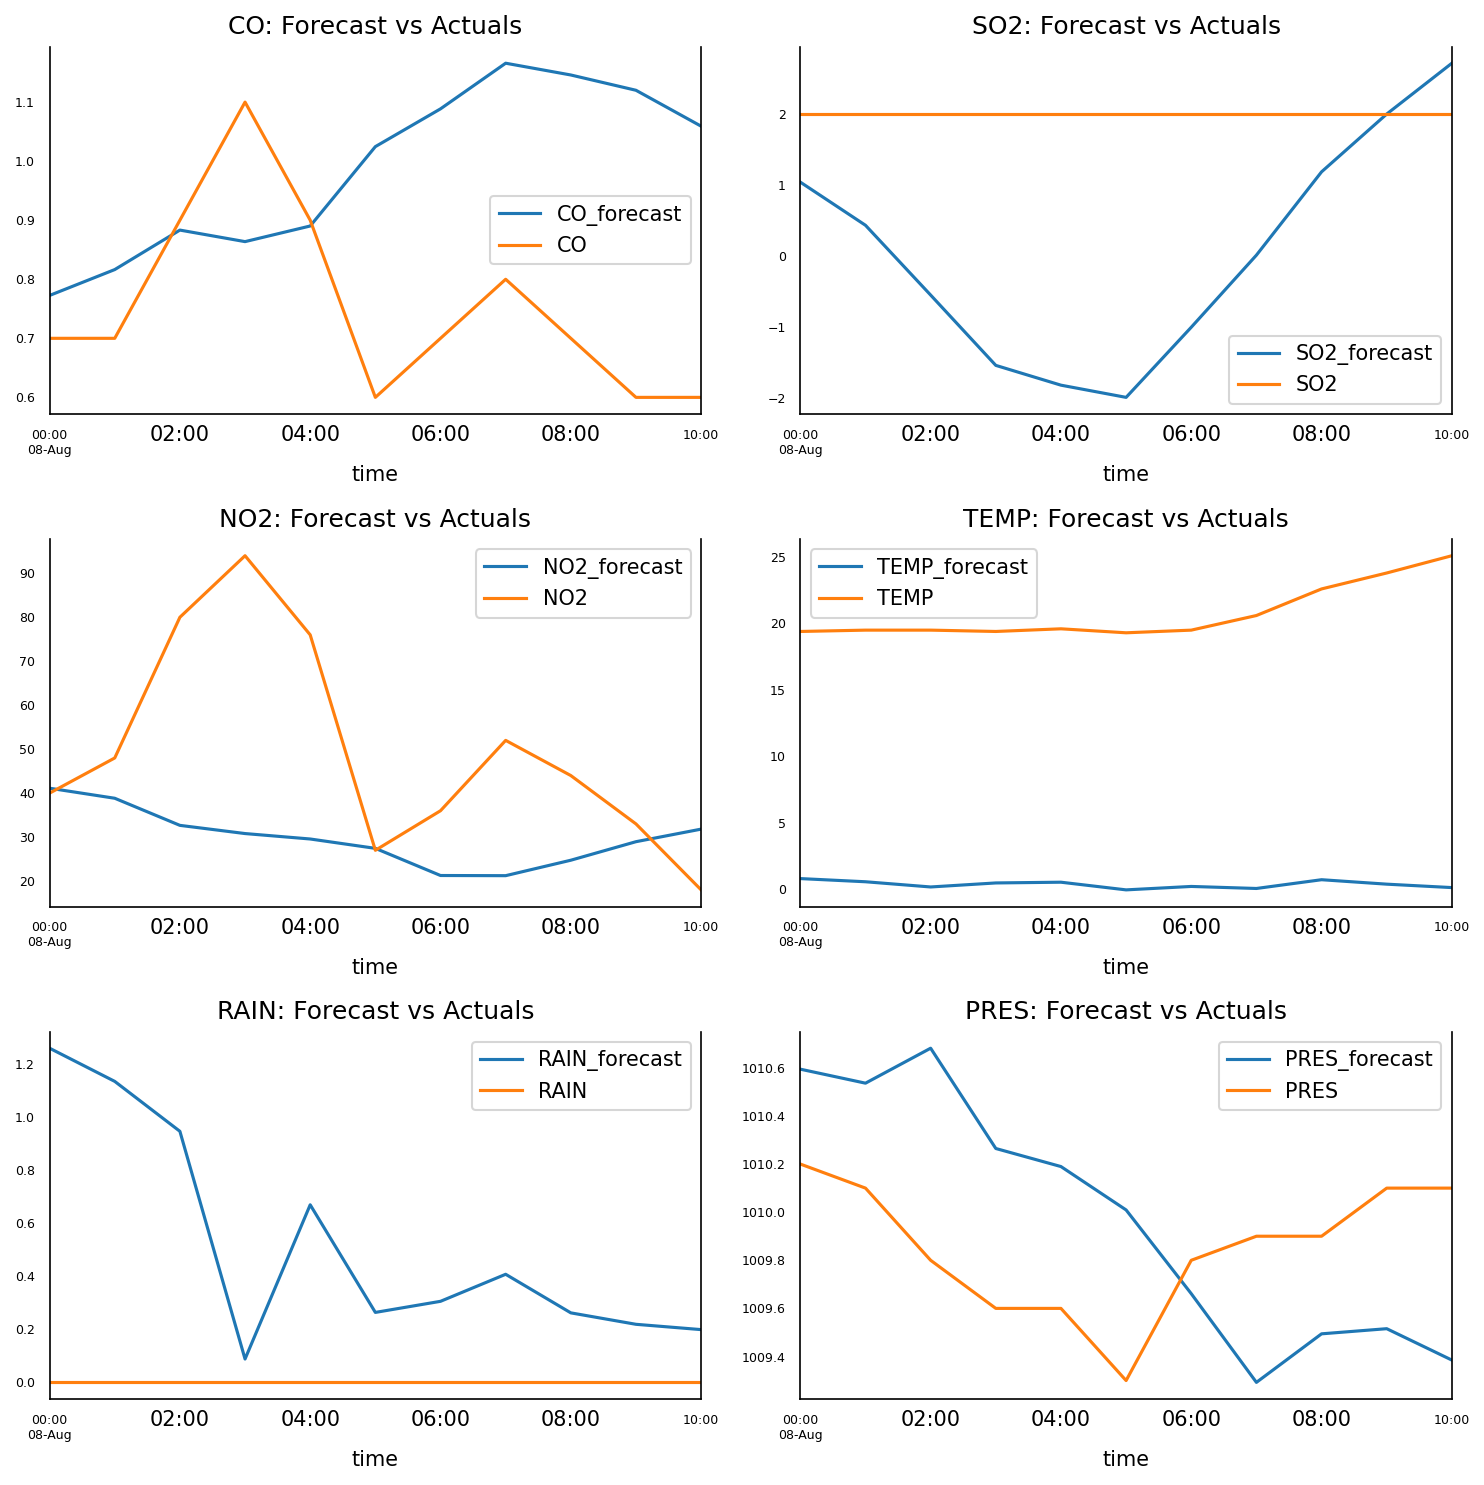

In [259]:
fig, axes = plt.subplots(nrows=int(len(df3.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df3.columns, axes.flatten())):
    df_results2[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    valid2[col].plot(legend=True, ax=ax)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()


<AxesSubplot:xlabel='time'>

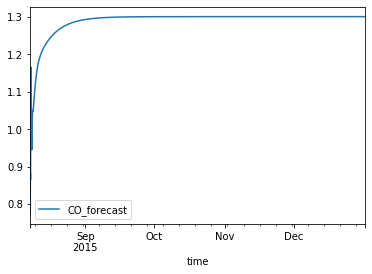

In [230]:
df_results['CO_forecast'].plot(legend=True)

In [157]:
train

,CO,SO2,NO2,TEMP,RAIN,PRES
time,,,,,,
2014-01-01 00:00:00,1.5,15.0,73.0,0.0,0.0,1009.1
2014-01-01 01:00:00,1.5,39.0,84.0,0.0,0.0,1008.8
2014-01-01 02:00:00,1.7,39.0,85.0,0.4,0.0,1008.8
2014-01-01 03:00:00,0.0,63.0,83.0,-1.1,0.0,1008.2
2014-01-01 04:00:00,0.0,55.0,83.0,1.6,0.0,1008.0
...,...,...,...,...,...,...
2015-08-07 19:00:00,0.8,2.0,13.0,8.2,6.9,1008.2
2015-08-07 20:00:00,0.6,2.0,10.0,-3.9,36.6,1010.5
2015-08-07 21:00:00,0.7,2.0,33.0,4.0,0.3,1010.3


In [226]:
valid=df3[int(0.8*(len(df3))):]
valid

,CO,SO2,NO2,TEMP,RAIN,PRES
time,,,,,,
2015-08-08 00:00:00,0.7,2.0,40.0,19.4,0.0,1010.2
2015-08-08 01:00:00,0.7,2.0,48.0,19.5,0.0,1010.1
2015-08-08 02:00:00,0.9,2.0,80.0,19.5,0.0,1009.8
2015-08-08 03:00:00,1.1,2.0,94.0,19.4,0.0,1009.6
2015-08-08 04:00:00,0.9,2.0,76.0,19.6,0.0,1009.6
...,...,...,...,...,...,...
2015-12-31 19:00:00,2.3,28.0,114.0,-1.4,0.0,1026.3
2015-12-31 20:00:00,3.2,27.0,118.0,-2.5,0.0,1026.2
2015-12-31 21:00:00,4.5,30.0,125.0,-2.7,0.0,1025.8


In [260]:
test=valid2

In [264]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: CO')
accuracy_prod = forecast_accuracy(df_results2['CO_forecast'].values, test['CO'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: SO2')
accuracy_prod = forecast_accuracy(df_results2['SO2_forecast'].values, test['SO2'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: NO2')
accuracy_prod = forecast_accuracy(df_results2['NO2_forecast'].values, test['NO2'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: TEMP')
accuracy_prod = forecast_accuracy(df_results2['TEMP_forecast'].values, test['TEMP'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: RAIN')
accuracy_prod = forecast_accuracy(df_results2['RAIN_forecast'].values, test['RAIN'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

print('\nForecast Accuracy of: PRES')
accuracy_prod = forecast_accuracy(df_results2['PRES_forecast'].values, test['PRES'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast Accuracy of: CO
mape :  0.4094
me :  0.23
mae :  0.2778
mpe :  0.365
rmse :  0.3331
corr :  -0.422
minmax :  0.2594

Forecast Accuracy of: SO2
mape :  1.0426
me :  -1.9547
mae :  2.0852
mpe :  -0.9773
rmse :  2.4681
corr :  nan
minmax :  1.034

Forecast Accuracy of: NO2
mape :  0.4035
me :  -19.9574
mae :  22.7537
mpe :  -0.2559
rmse :  30.4749
corr :  0.0861
minmax :  0.3731

Forecast Accuracy of: TEMP
mape :  0.9821
me :  -20.3873
mae :  20.3873
mpe :  -0.9821
rmse :  20.4876
corr :  -0.0752
minmax :  0.9821

Forecast Accuracy of: RAIN
mape :  inf
me :  0.5237
mae :  0.5237
mpe :  inf
rmse :  0.655
corr :  nan
minmax :  1.0

Forecast Accuracy of: PRES
mape :  0.0006
me :  0.1113
mae :  0.557
mpe :  0.0001
rmse :  0.5894
corr :  -0.09
minmax :  0.0006


<ipython-input-264-ab63f61fe982>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
<ipython-input-264-ab63f61fe982>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)


In [142]:
enumerate(zip(df3.columns, axes.flatten()))

<ipython-input-51-a0a85d18db0a>:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  rd=sm.tsa.seasonal_decompose(data['RAIN'].values,freq=12)


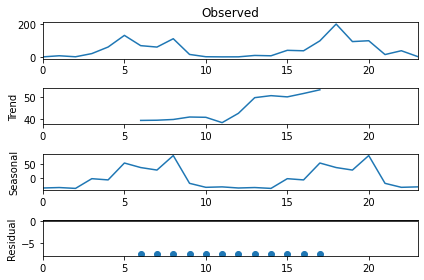

In [51]:
#时序分解
import statsmodels.api as sm

rd=sm.tsa.seasonal_decompose(data['RAIN'].values,freq=12)

resplot=rd.plot()

In [ ]:
from statsmodels.tsa.seasonal import STL
res = STL(df['RAIN']).fit()
res.plot()
plt.show() 

ValueError: Unable to determine period from endog